In [10]:
import eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# EDA Modelling Ideas

- Get actual player positions from the official fpl api. May require an intense mapping of player names if not set accordingly.
- Upload file of points rules so that we can calculate the per 90 expected points.
- Compare the per 90 expected points to actual points.

- For regression model we can look at correlations between form, xG points, xAG points, clean sheet points, minutes played

In [2]:
fwds = eda.player_data(eda.Position.FWD, sorted = True)
# Get season stats for first forward
recent = eda.recent_stats(fwds.loc[0, "id"])
recent = eda.featurizer(recent)

In [3]:
# fwds = fwds.reset_index(drop=True)
print(fwds["total_points"])


0     80
1     72
2     61
3     49
4     47
      ..
89     0
90     0
91     0
92     0
93     0
Name: total_points, Length: 94, dtype: int64


<Axes: >

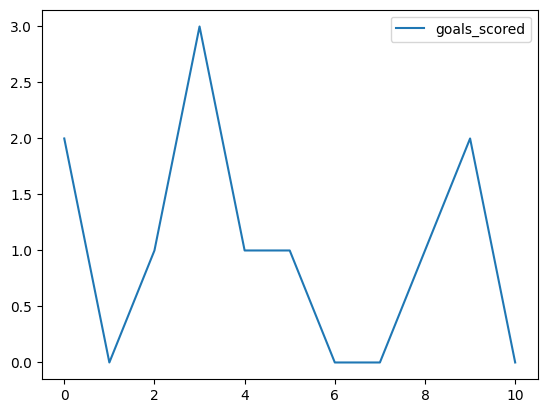

In [9]:
recent.plot(y=["goals_scored"])

In [11]:
exog = ["ict_index", "expected_goals", "fixture"]
endog = ["goals_scored"]
Y = recent[endog].values
X = sm.add_constant(recent[exog].values)
model = sm.OLS(Y, X)
results = model.fit()

/home/rover/code/fpl/.venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


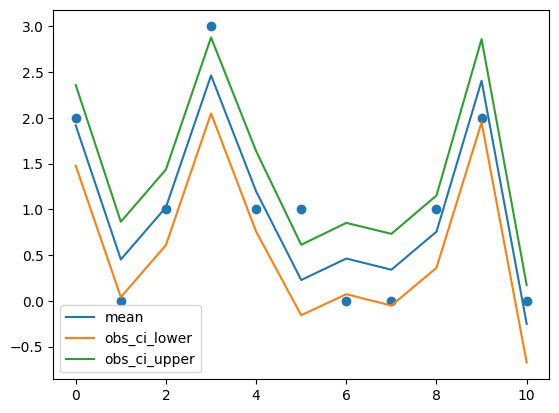

In [14]:
results.summary()
insample = results.get_prediction().summary_frame(alpha=0.5)
insample.plot(y=["mean", "obs_ci_lower", "obs_ci_upper"])

# Plot the original points as well
plt.scatter(insample.index.values, results.model.endog)
plt.show()


In [ ]:
# ICT Index. xG and fixture must now be predicted. Fixture is easy and known, xG and ict we need to look at plots and examine variability.
# Easy start is to use the average value